# Проект - Исследовательский анализ данных

`Суть проекта` - Даны данные по квартирам из "Яндекс Недвижимость". По ним нужно провести анализ:
- Определить природу возникновения редких и выбивающихся значений.
- Определить какие факторы влияют на стоимость квартиры.
- Подсчитать различные дополнительные параметры, которые пригодятся в исследовании.

`Конечная цель` - оценка влияния различных факторов и параметров на стоимость недвижимости.

В конце нужно сделать общий вывод по результатам анализа.

### Шаг 1 - Откройте файл с данными и изучите общую информацию

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data)
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изучив таблицу и представленные мне данные а так же `info()` по ней заметил следующее - 

`first_day_exposition` - представлен в `object` типе, а должен быть в типе `datetime`. 

`last_price` - представлен в `float64`, надо сделать в `int64`

`ceiling_height` - в отличии от 23699 строк, тут только 14505 -> Встречаются `NaN` значения.

`floors_total` - Так же вместо 23699 строк, их тут меньше 23613, так же тип значения этого столбца - `float`, должен быть 
`int`.

`living_area` - Так же есть нулевые строки.

`is_apartment` - Так жесть нулевые строки и представлено в строковом типе, должно быть в типе `bool`.

`kitchen_area` - Так же есть нулевые строки.

`balcony` - Так же есть нулевые строки и тип `float64`

`locality_name` - Так же есть нулевые строки.

`airports_nearest` - Так же есть нулевые строки.

`cityCenters_nearest` - Так же есть нулевые строки.

`parks_around3000` - Так же есть нулевые строки и должно быть типа `int`

`parks_nearest` - Так же есть нулевые строки и должно быть типа `int`

`ponds_around3000` - Так же есть нулевые строки и должно быть типа `int`

`ponds_nearest` - Так же есть нулевые строки и должно быть типа `int`

`days_exposition` - Так же есть нулевые строки и должно быть типа `int`

### Шаг 2 - Предобработка данных

В конечном итоге исправил все возможные ошибки, некоторые столбцы не стал исправлять т.к причина появления пропусков в тех столбцах не известна.

In [3]:
#Перевел значения в столбце в нужный вид, избавился от времени т.к везде стоит одинаковое время.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [4]:
data = data[data['rooms']<=7]#Убрал квартиры с числом комнат меньше чем 7

In [5]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')#Заменил пропуски на 0 и перевел в int для дальнейшего иследования
data = data[data['days_exposition']<=800]#убрал выбивающиеся значения
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602


[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   2.77
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.13   3.8    3.15   3.55   3.62   3.12   2.53   2.74   2.96
   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54   3.53
   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18   2.3
   3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52   3.95   3.75
   3.11   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.35   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.     3.16   3.26   3.34   2.81   3.44   2.97   4.37   2.68   3.22
   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63   3.14
   3.32  26.     1.2    8.3    2.98   2.86   4.4    3.28   3.04   5.5
   3.23   3.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602


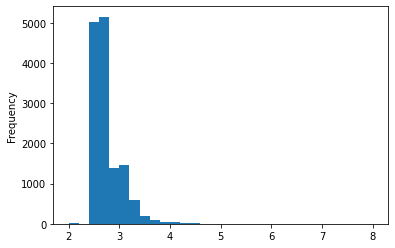

In [6]:
#Работаю со столбцом ceiling_height. Слишком много пропущенных значений
print(data['ceiling_height'].unique())#Кроме как NaN можно ещё встретить значения которые невозможны
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', bins = 30, kind = 'hist', range = (2,8))
#средние значения от медиан не сильно отличаются
display(data)
data['ceiling_height'].describe()
median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(median)#Заполнил пропуски медианными значениями
data = data[(data['ceiling_height']>=2)&(data['ceiling_height']<=4)]#Убрал значения где меньше 2-ух и больше 4-ех

In [7]:
data['last_price'] = data['last_price'].astype('int')#Испрваил значения на целочисленные
data = data[data['last_price'] < 20000000]
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602


In [8]:
data['living_area'].describe()#Много знаков после запятой, но сильно это на исследование не повлияет.


count    20587.000000
mean        32.325592
std         16.367257
min          2.000000
25%         18.400000
50%         30.000000
75%         41.000000
max        190.000000
Name: living_area, dtype: float64

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)#Заполнил пропуски значением False т.к скорее всего забывали указывать что это не апартаменты.
data['is_apartment'].value_counts()

False    22318
True        38
Name: is_apartment, dtype: int64

In [10]:
print(data['kitchen_area'].describe())#Медиана не сильно отличается от среднего значения, поэтому заполню медианными значениями пропуски.
median = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(median)
data['kitchen_area'].describe() # Среднее значение немного уменьшилось, но не значительно.

count    20204.000000
mean        10.074526
std          4.684639
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max        100.700000
Name: kitchen_area, dtype: float64


count    22356.000000
mean         9.971092
std          4.464715
min          1.300000
25%          7.200000
50%          9.000000
75%         11.000000
max        100.700000
Name: kitchen_area, dtype: float64

In [11]:
print(data['balcony'].value_counts())#Увидел что количество балконов представлено в типе float + очень много пропусков, скорее всего вместо них должны стоять нули
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'].value_counts())#исправил


1.0    3970
0.0    3577
2.0    3523
5.0     282
4.0     162
3.0      74
Name: balcony, dtype: int64
0    14345
1     3970
2     3523
5      282
4      162
3       74
Name: balcony, dtype: int64


### Шаг 3 - Посчитайте и добавьте в таблицу

##### Цена квадратного метра

In [12]:
data['price_meter'] = data['last_price'] / data['total_area']
data['price_meter'] = data['price_meter'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22356 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22356 non-null  int64         
 1   last_price            22356 non-null  int64         
 2   total_area            22356 non-null  float64       
 3   first_day_exposition  22356 non-null  datetime64[ns]
 4   rooms                 22356 non-null  int64         
 5   ceiling_height        22356 non-null  float64       
 6   floors_total          22275 non-null  float64       
 7   living_area           20587 non-null  float64       
 8   floor                 22356 non-null  int64         
 9   is_apartment          22356 non-null  bool          
 10  studio                22356 non-null  bool          
 11  open_plan             22356 non-null  bool          
 12  kitchen_area          22356 non-null  float64       
 13  balcony         

##### День недели, месяц и год публикации объявления

In [13]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday#Создал столбец дней недели
data['month_exposition'] = data['first_day_exposition'].dt.month#Столбец месяцев
data['year_exposition'] = data['first_day_exposition'].dt.year#Столбец годов
#display(data)

##### Этаж квартиры; варианты — первый, последний, другой

In [14]:
#Написал функцию определения категории этажа
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)#Применил функцию к новому столбцу
#display(data)

##### Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [15]:
data['living_area_ratio'] = data['living_area'] / data['total_area']#Жилая площадь к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']#Кухонная площадь к общей
#display(data)

### Шаг 4 - Проведите исследовательский анализ данных и выполните инструкции.

##### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.


count    22356.000000
mean        56.335451
std         24.124357
min         12.000000
25%         39.700000
50%         50.800000
75%         67.000000
max        320.000000
Name: total_area, dtype: float64


<AxesSubplot:ylabel='Frequency'>

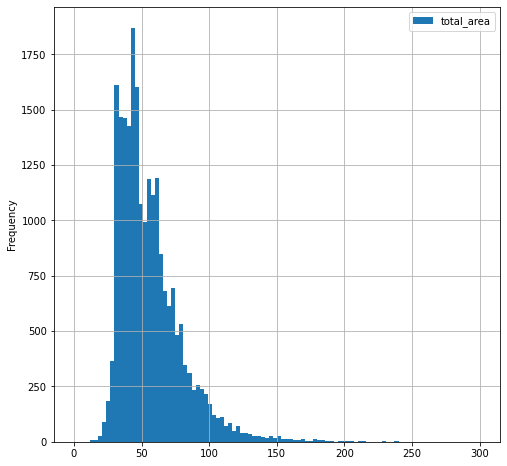

In [16]:
#Площадь
print(data['total_area'].describe())#Выбросы есть, но незначительные, выглядит всё вполне нормально и логично
data.plot(y = 'total_area', kind = 'hist', range = (0,300), bins = 100, grid=True, figsize = (8,8))

Есть очень большие значения из разряда в 900 м^2, однако сильно это не влияет.

count    22356.000000
mean         5.374668
std          3.162058
min          0.012190
25%          3.397250
50%          4.500000
75%          6.450000
max         19.999000
Name: price_in_millions, dtype: float64


<AxesSubplot:ylabel='Frequency'>

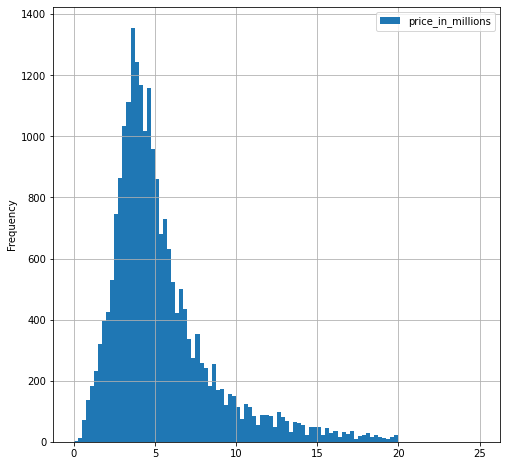

In [17]:
#Цена
data['price_in_millions'] = data['last_price']/1000000 #Для удобства создал ещё один столбец в котором цена указана в миллионах
#display(data)
print(data['price_in_millions'].describe())#За исключением выбросов, данные выглядят так же логично
data.plot(y = 'price_in_millions', kind = 'hist',range = (0,25), bins = 100, grid=True, figsize = (8,8))#За исключением выбросов, данные выглядят так же логично

Так же есть огромные значения в 763 миллиона, но в среднем цена квартир равна 6.54, а медиана 4.65, поэтому завышенных значений не так много.

count    22356.000000
mean         2.000000
std          0.972537
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64
1    7874
2    7661
3    5386
4     958
5     211
0     191
6      54
7      21
Name: rooms, dtype: int64


<AxesSubplot:ylabel='Frequency'>

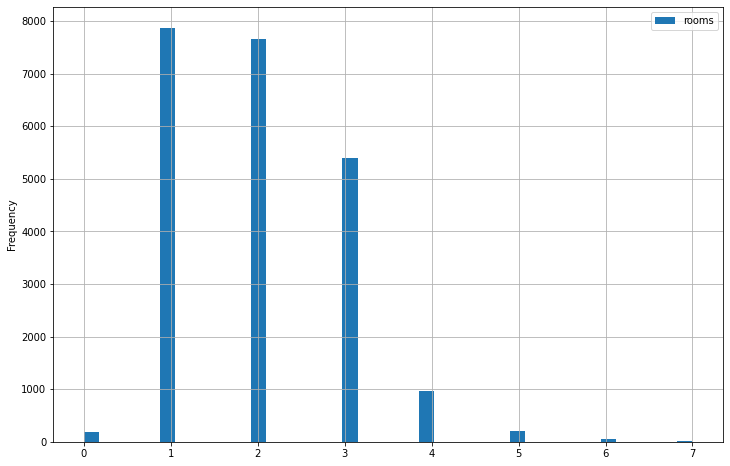

In [18]:
#Число комнат
print(data['rooms'].describe())
print(data['rooms'].value_counts())
data.plot(y = 'rooms', kind = 'hist', bins = 40, grid=True, figsize = (12,8))#Так же не вижу отклонений

Пару десятков квартир с количеством комнат больше чем 8, но в целом больше всего квартир 1-комнатных, 2-комнатных, 3 и 4.

count    22356.000000
mean         2.682721
std          0.189944
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:ylabel='Frequency'>

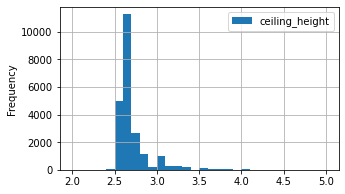

In [19]:
#Высота потолков
print(data['ceiling_height'].describe())
data.plot(y = 'ceiling_height', kind = 'hist',range = (2,5), bins = 30, grid=True, figsize = (5,3))#Так же все выглядит логично

Есть слишком высокие значения и слишком низкие, но в основном квартиры высотой от 2.5 до 2.8

##### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?


count    19393.000000
mean       153.968288
std        163.708914
min          1.000000
25%         43.000000
50%         90.000000
75%        208.000000
max        800.000000
Name: days_exposition, dtype: float64

45     879
60     537
7      232
30     204
4      175
      ... 
634      1
734      1
730      1
769      1
773      1
Name: days_exposition, Length: 783, dtype: int64

<AxesSubplot:ylabel='Frequency'>

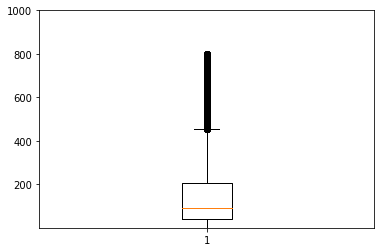

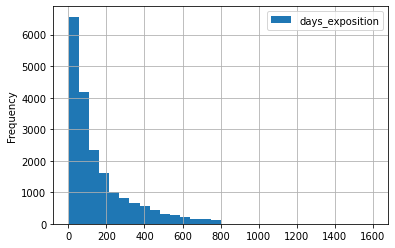

In [20]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)
display(data[data['days_exposition']!=0]['days_exposition'].describe())
display(data[data['days_exposition']!=0]['days_exposition'].value_counts())#Заметил что значения 45, 60, 7, 30, 90 в слишком большом количестве
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))

Исходя из имеющихся данных:

`Во-первых` - Сложно сказать когда квартира была продана, а когда снята с продажи, соответствующего столбца не имеется.

`Во-вторых` - Имеются выпадающие значения в `7, 30, 45, 60, 90` дней, в это количество дней чаще всего снимают с продажи. С чем именно это связано - точно не знаю, предполагаю что это аномалии, поскольку природа таких значений не известна.

`В-третьих` - Среднее равно 180, медиана равна 95.

`В-четвертых` - По ящику с усами выбросы начинаются после +- 500, с обратной стороны выбросов нет, следовательно есть только очень долгие продажи в более чем 500 дней.

##### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.


count    17977.000000
mean       162.103354
std        167.335436
min          1.000000
25%         40.000000
50%        101.000000
75%        224.000000
max        800.000000
Name: days_exposition, dtype: float64

7      232
30     204
4      175
90     175
3      156
      ... 
768      1
657      1
786      1
572      1
651      1
Name: days_exposition, Length: 781, dtype: int64

<AxesSubplot:ylabel='Frequency'>

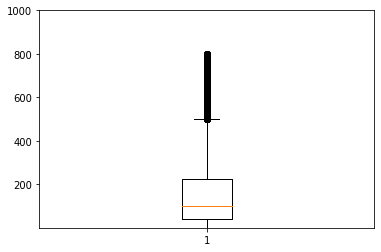

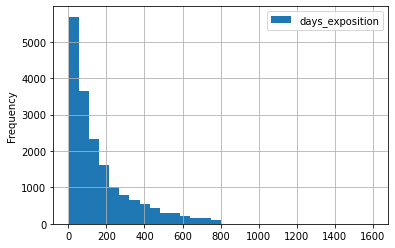

In [21]:
#Убрать все не нужные значения и поместить срез в новую таблицу.
#good_data = data.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 0')
good_data = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 0')
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)
display(good_data['days_exposition'].describe())
display(good_data['days_exposition'].value_counts())
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))

По итогу медиана и средние стали соответственно 108 и 190, вместо 95 и 180. 

Граница после которой начинаются выбросы немного сместилась к 600

##### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio,price_in_millions
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,755.0,0,120370,3,3,2019,другой,0.472222,0.231481,13.000
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,81,82920,1,12,2018,первый,0.460396,0.272277,3.350
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,574.0,558,92785,3,8,2015,другой,0.612500,0.148214,5.196
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121,100000,1,6,2018,другой,0.320000,0.410000,10.000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,55,95065,0,9,2018,другой,0.473684,0.299342,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,381.0,0,72490,1,3,2017,другой,0.547792,0.103356,9.700
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,NaN,45,52542,0,1,2018,другой,0.644068,0.144068,3.100
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,0,44091,6,2,2018,первый,0.523810,0.158730,2.500
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,196.0,602,149511,1,3,2017,другой,NaN,0.303583,11.475


0.7723617224344905


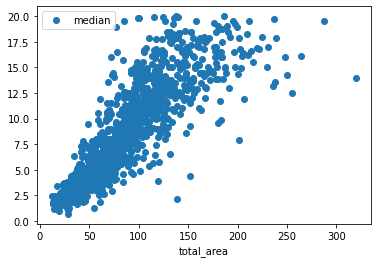

In [22]:
display(data)
#Зависимости цены от площади
total_area_pt = data.pivot_table(index = 'total_area', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
total_area_pt.columns = ['mean', 'count', 'median']
total_area_pt.plot(y = 'median', style = 'o')
print(data['total_area'].corr(data['price_in_millions']))#Корреляция

Корреляция достаточно низкая, поэтому сильной зависимости между стоимости за 1 м^2 не сильно изменяется за счет площади

,mean,count,median
rooms,,,
0,2.978909,191,2.7000
1,3.782322,7874,3.6000
2,5.302602,7661,4.7400
3,6.917027,5386,6.0000
4,8.849576,958,8.0000
5,11.297457,211,11.3000
6,13.772270,54,13.4005
7,15.304286,21,15.3500


0.5094656717738333

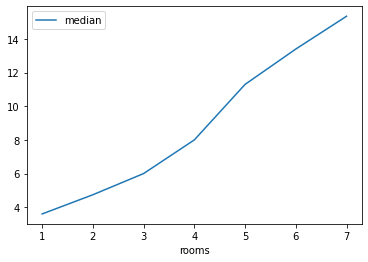

In [23]:
#Зависимость цены от числа комнат
rooms_pt = data.pivot_table(index = 'rooms', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
rooms_pt.columns = ['mean', 'count', 'median']
display(rooms_pt)
rooms_pt.query('count > 20 and rooms > 0').plot(y = 'median')
data['rooms'].corr(data['price_in_millions'])

Самые высокие цены у квартир с 7 комнатами, при этом чем ближе количество квартир к значению 1, тем ниже стоимость

-0.34990315948469897

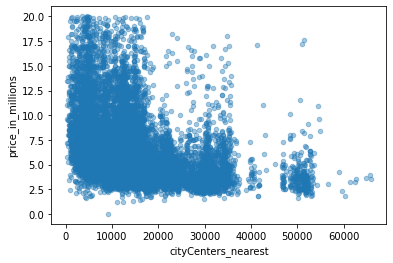

In [24]:
#Зависимость от расположения по отношению к центру
data.plot(y = 'price_in_millions', x = 'cityCenters_nearest', kind = 'scatter', alpha = 0.4)

data['cityCenters_nearest'].corr(data['price_in_millions'])

Резкий скачок вверх примерно на расстоянии 7км от центра, поэтому можно сказать, что чем ближе к центру - тем выше стоимость.

<AxesSubplot:xlabel='floor_category'>

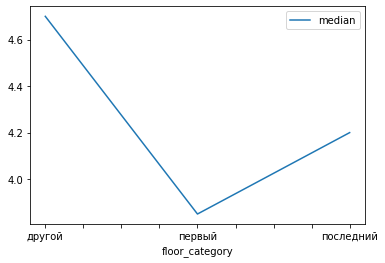

In [25]:
#Зависимость цены от этажа
floor_category_pt = data.pivot_table(index = 'floor_category', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
floor_category_pt.columns = ['mean', 'count', 'median']
floor_category_pt.plot(y = 'median')

Стоимость квартир на 1 этаже ниже стоимости квартир на последнем этаже, при этом стоимость квартира на каком-либо другом этаже выше чем у квартир на первом и третьем этаже.

,mean,count,median
weekday_exposition,,,
3,5.456445,4019,4.50
4,5.343347,3805,4.50
5,5.226344,1835,4.50
6,5.204557,1612,4.50
0,5.332825,3403,4.53
2,5.457585,3740,4.59
1,5.417586,3942,4.60


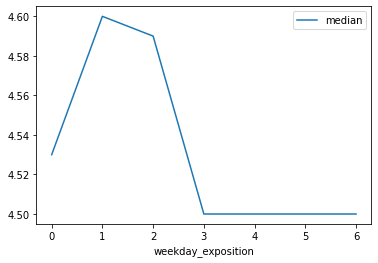

In [26]:
#Зависимость от дня недели
weekday_exposition_pt = data.pivot_table(index = 'weekday_exposition', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
weekday_exposition_pt.columns = ['mean', 'count', 'median']
weekday_exposition_pt.plot(y = 'median')
weekday_exposition_pt.sort_values('median')

0 - понедельник, 6 - воскресенье. По вторника цена самая высокая, в субботы самая низкая, со вторника по воскресенье цена падает

,mean,count,median
month_exposition,,,
6,5.150379,1656,4.3000
5,5.329922,1201,4.4800
1,5.353092,1406,4.5000
7,5.381118,1593,4.5000
8,5.382148,1668,4.5000
10,5.349146,2035,4.5000
2,5.369044,2492,4.5500
3,5.360332,2417,4.5500
12,5.338736,1510,4.5775


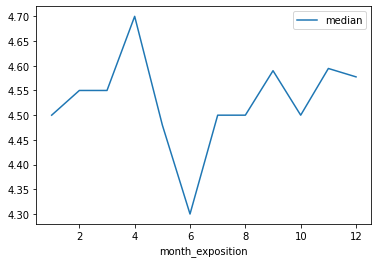

In [27]:
#Зависимость от месяца
month_exposition_pt = data.pivot_table(index = 'month_exposition', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
month_exposition_pt.columns = ['mean', 'count', 'median']
month_exposition_pt.plot(y = 'median')

month_exposition_pt.sort_values('median')

За год имеется 3 пика максимально высоких цен: `Апрель, Август и Ноябре`.
Самые низкие цены выпадают на: `Май и Июнь`
Так же есть падение с сентября по октябрь.

,mean,count,median
year_exposition,,,
2016,5.330676,2514,4.40
2017,5.315141,7909,4.40
2018,5.263981,8305,4.50
2015,5.891243,789,4.99
2019,5.697529,2780,4.99
2014,8.688426,59,7.50


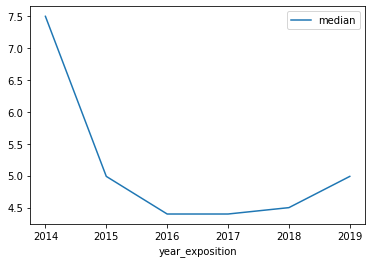

In [28]:
#Зависимость от года
year_exposition_pt = data.pivot_table(index = 'year_exposition', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
year_exposition_pt.columns = ['mean', 'count', 'median']
year_exposition_pt.plot(y = 'median')
year_exposition_pt.sort_values('median')

С `2014` года цена квадратного метра падала до `2016` года, после чего росла до `2019` года.

##### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`.


In [29]:
locality_pt = data.pivot_table(index = 'locality_name', values = 'price_in_millions', aggfunc=['count', 'mean'])
locality_pt.columns = ['count', 'mean']
locality_pt = locality_pt.sort_values('count', ascending = False).head(10)
display(locality_pt)
display(locality_pt[locality_pt['mean']==locality_pt['mean'].max()])#Город, в котором самая высокая средняя стоимость квадратного метра
display(locality_pt[locality_pt['mean']==locality_pt['mean'].min()])#Город, в котором самая низка средняя стоимость квадратного метра

,count,mean
locality_name,,
Санкт-Петербург,14580,6.383897
посёлок Мурино,507,3.662474
посёлок Шушары,433,4.118977
Всеволожск,387,3.746553
Пушкин,347,5.860088
Колпино,333,3.851742
посёлок Парголово,322,4.492765
Гатчина,297,3.484691
деревня Кудрово,290,4.247191


,count,mean
locality_name,,
Санкт-Петербург,14580,6.383897


,count,mean
locality_name,,
Выборг,229,3.249183


Самые дорогие метры в Санкт-Петербурге, самые дешёвые в Выборге

##### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге `(locality_name)`. Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

,price_in_millions
cityCenters_nearest_km,
0,9.967421
1,10.172670
2,9.640187
3,9.001928
4,9.567095
5,8.726505
6,8.176021
7,7.976804
8,7.256136


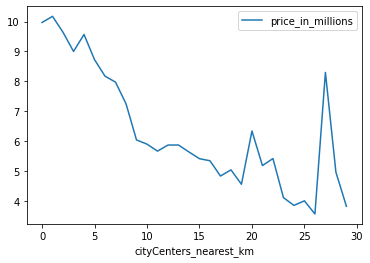

In [30]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(100000)
#data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = (
    data
    .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=100000')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'price_in_millions', aggfunc = 'mean')
)
pivot_table_km.plot()
pivot_table_km

Судья по графику и таблице, цена резко начинает расти с 8 километров, поэтому центром можно назвать 8 километра.

##### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

Исходя из прошлого задания и определив, что центр - это радиус в 8 километров, можно отсортировать квартиры по этому признаку:

In [31]:
spb_data_3km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8')#Создал новый датафрейм в котором квартиры из Питера на расстоянии в 3км и меньше.
display(spb_data_3km)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_area_ratio,kitchen_area_ratio,price_in_millions,cityCenters_nearest_km
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,121,100000,1,6,2018,другой,0.320000,0.410000,10.000,8
24,8,6500000,97.20,2015-10-31,2,2.65,3.0,46.5,1,False,...,265,66872,5,10,2015,первый,0.478395,0.201646,6.500,2
35,6,15500000,149.00,2017-06-26,5,2.65,5.0,104.0,4,False,...,644,104026,0,6,2017,другой,0.697987,0.114094,15.500,3
52,20,11795000,136.00,2017-09-22,6,3.00,2.0,94.0,2,False,...,0,86727,4,9,2017,последний,0.691176,0.080882,11.795,6
61,18,7990000,74.00,2017-08-24,2,2.65,4.0,43.0,4,False,...,609,107972,3,8,2017,последний,0.581081,0.270270,7.990,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000,47.00,2016-05-20,1,2.65,6.0,18.2,1,False,...,131,90425,4,5,2016,первый,0.387234,0.310638,4.250,4
23681,13,5250000,43.00,2018-05-11,2,2.50,5.0,29.0,2,False,...,80,122093,4,5,2018,другой,0.674419,0.139535,5.250,7
23690,3,5500000,52.00,2018-07-19,2,2.65,5.0,31.0,2,False,...,15,105769,3,7,2018,другой,0.596154,0.115385,5.500,6
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,519,129903,3,10,2016,другой,0.552812,0.145405,9.470,4


##### Влияние числа комнат на стоимость квадратного метра

0.5245849114925314

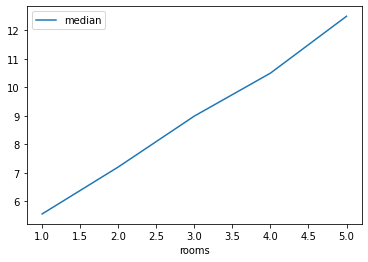

In [32]:
spb_rooms_pt = spb_data_3km.pivot_table(index = 'rooms', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
spb_rooms_pt.columns = ['mean', 'count', 'median']
spb_rooms_pt.query('count > 50 and rooms > 0').plot(y = 'median')
spb_data_3km['rooms'].corr(spb_data_3km['price_in_millions'])

Судя по графику, чем больше комнат, тем выше стоимость квартиры, корреляция хоть и низкая, но имеется

##### Влияние этажа на стоимость квадратного метра

In [ ]:
spb_floor_category_pt = spb_data_3km.pivot_table(index = 'floor_category', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
spb_floor_category_pt.columns = ['mean', 'count', 'median']
spb_floor_category_pt.plot(y = 'median')

Квартиры на первых этажах дешевле, чем на всех остальных, при этом квартиры на последнем этаже дешевле квартир между первым и последним этажом. Аналогичная ситуация была в общей выборке

##### Влияние расстояния от центра на стоимость квадратного метра


In [ ]:
print(spb_data_3km['cityCenters_nearest'].corr(spb_data_3km['price_in_millions']))
display(spb_data_3km['cityCenters_nearest'])
spb_data_3km.plot(y = 'price_in_millions', x = 'cityCenters_nearest', kind = 'scatter', alpha = 0.4)

Зависимости не вижу, хотя корреляция говорит о том, что при увеличении одного значения уменьшается другой.

##### Влияние даты размещения на стоимость квадратного метра


In [ ]:
# По дням недели 
spb_weekday_exposition_pt = spb_data_3km.pivot_table(index = 'weekday_exposition', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
spb_weekday_exposition_pt.columns = ['mean', 'count', 'median']
spb_weekday_exposition_pt.plot(y = 'median')
spb_weekday_exposition_pt.sort_values('median')
#Зависимость в общей выборке
weekday_exposition_pt = data.pivot_table(index = 'weekday_exposition', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
weekday_exposition_pt.columns = ['mean', 'count', 'median']
weekday_exposition_pt.plot(y = 'median')
weekday_exposition_pt.sort_values('median')

В четверг и воскресенье самая низкая цена, в то время как в понедельник и субботу самые высокие цены. Довольно сильно отличается от данных в общей выборке `(второй график)`

In [ ]:
# По месяцам
spb_month_exposition_pt = spb_data_3km.pivot_table(index = 'month_exposition', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
spb_month_exposition_pt.columns = ['mean', 'count', 'median']
spb_month_exposition_pt.plot(y = 'median')
spb_month_exposition_pt.sort_values('median')

#По месяцам в общей выборке
month_exposition_pt = data.pivot_table(index = 'month_exposition', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
month_exposition_pt.columns = ['mean', 'count', 'median']
month_exposition_pt.plot(y = 'median')
month_exposition_pt.sort_values('median')

Самые высокие цены в `Апреле, октябре и декабре`. Самые низкие в `Июне, августе и ноябре`, ниже всего цена в Июне

In [ ]:
# По годам



# По годам в общей выборке
year_exposition_pt = data.pivot_table(index = 'year_exposition', values = 'price_in_millions', aggfunc = ['mean', 'count', 'median'])
year_exposition_pt.columns = ['mean', 'count', 'median']
year_exposition_pt.plot(y = 'median')
year_exposition_pt.sort_values('median')
display(data)

С 2014 по 2015 года в питере идёт падение цен, но при этом уже после 2015 начинают расти с одинаковой скоростью, в отличии от данных по всей выборке, где с 2015 по 2016 так же шло падение стоимости (но не такое сильное) и при этом более резкий рост после 2017 года.

# Шаг 5. Напишите общий вывод

Была проведена предобработка данных, в результате которой были обработаны нужные столбцы для дальнейшей работы с ними, некоторые столбы были не тронуты, т.к вы этом не было необходимости. Встречались аномалии, которые в дальнейшем не учитывались при анализе.
В ходе анализа было определено, что самым нормальным распределением стоимости квартир является от продажи день в день, до продажи в срок до 600 дней, однако в данных не имелось информации чтобы определить, была ли квартира продана или она была снята с продаж.

##### Сильная зависимость
- Зависимость от расстояния до центра. В среднем после 7км от центра, метр квадратный начинает стоить дороже
- Зависимость от количества комнат. Чем ближе количество комнат к 3-ем комнатам, тем ниже стоимость квадратного метра.
- Зависимость от этажа. Первые этажи самые дешёвые, далее идут самые последние этажи, после них все остальные этажи считаются самыми дорогими.


##### Слабая зависимость
- Зависимость от количества квадратных метров. По общей выборке, стоимость квартир в зависимости от квадратных метров не сильно зависела.
- Зависимость от времени. В целом зависимость есть, но она слабая, цены не сильно меняются в периоды подъёма и спада стоимости.

В качестве параметров для выявления стандартной квартиры брать: 

`Время за которое была продана` - от 42 до 249 дней.

`Площадь` - от 40 до 69 метров.

`Цена` - от 3.4 до 6.8 млн.

`Число комнат` - От 1 до 3 комнаты.

`Высота потолков` - От 2.52 до 2.8 метров.